In [19]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [6]:
X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=.5, shuffle=True, random_state=0)

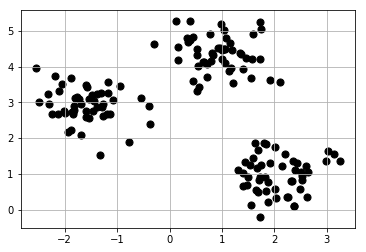

In [14]:
plt.scatter(X[:,0], X[:,1], c='black', marker='o', s=50)
plt.grid()
plt.show()

How do we measure similarity between objects? <br />
Commonly used **squared Euclidean distance**. <br />
$
d(x,y)^2 = \Sigma_{j=1}^m (x_j - y_j)^2 = \|x - y\|_2^2
$

###### within-cluster sum of squared errors (SSE)
$
SSE = \Sigma_{i=1}^n \Sigma_{j=1}^k w^{i,j} \|x^{(i)} - \mu^{(j)}\|_2^2
$

In [15]:
from sklearn.cluster import KMeans

In [16]:
km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)

In [17]:
y_km = km.fit_predict(X)

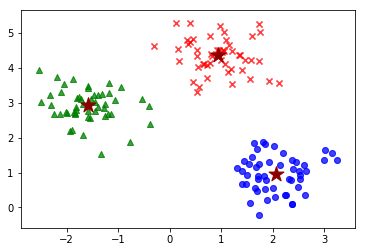

In [38]:
colors = ['r', 'b', 'g']
markers = ['x', 'o', '^']
for i in np.unique(y_km):
    mask = np.array(y_km == i)
    plt.scatter(X[mask, 0], X[mask, 1], c=colors[i], marker=markers[i], alpha=.5)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker='*', c='darkred', s=250)
plt.show()

# FCM Fuzzy C-means
$
SSE = \Sigma_{i=1}^n \Sigma_{j=1}^k w^{m(i,j)} \|x^{(i)} - \mu^{(j)}\|_2^2, m \in [1,\infty)
$

# Using the elbow method to find the optimal number of clusters

In [39]:
print 'Distortion: %.2f' % km.inertia_

Distortion: 72.48


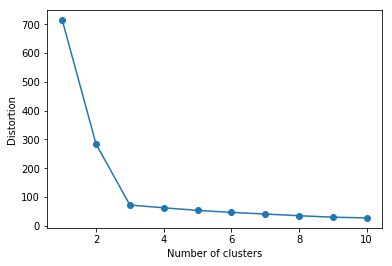

In [40]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

# Quantifying the quality of clustering via silhouette plots

In [41]:
km = KMeans(n_clusters=3, init='k-means++', n_init=10,
    max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

In [43]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

In [44]:
cluster_labels = np.unique(y_km)

In [49]:
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
n_clusters = cluster_labels.shape[0]

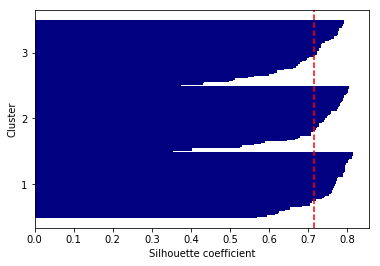

In [51]:
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
            edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()